In [26]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

## Question 1-a
handling duplicate value in a dataset in Python

In [2]:
# Import data from csv file

In [3]:
path = '../data/BA501_python_data.csv'
data = pd.read_csv(path)
data.head()

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,JP,20170402,12624548,5813140433216629693,16.138855,5006730028073359543,ANDROID_APPS
1,US,20170403,12624549,16333056276711034931,9.990000,5938685669571545259,ANDROID_APPS
2,JP,20170404,12624548,11227119161741298366,19.887087,17623708458399141713,ANDROID_APPS
3,US,20170403,12624548,11927299833124210932,19.990000,18042812344456618148,ANDROID_APPS
4,JP,20170403,12624549,11644727017708872749,88.220093,4325104700699531031,ANDROID_APPS


In [4]:
## remove duplication
dup_data =data[['experiment_id', 'vertical']]
unique_data = dup_data.drop_duplicates()
unique_data_on_selected_colum = dup_data.drop_duplicates(['vertical'])
# print the number of rows after remove duplication
print(dup_data.shape[0],unique_data.shape[0],unique_data_on_selected_colum.shape[0])

73910 14 7


## Question 1-b
### Manipulation tables in python and SQL
You are given two tables - friend_request and request_accepted. Friend_request contains requester_id, time and sent_to_id and request_accepted table contains time, acceptor_id and requester_id. How will you determine the overall acceptance rate of requests?

In [5]:
## fake data
friend_request = pd.DataFrame(
    {
        'requester_id': np.random.randint(1000,size=1000),
        'time':np.random.randint(100000,size=1000),
        'send_to_id': np.random.randint(1000,size=1000)
    }
)

request_accepted = friend_request.sample(frac=0.5,random_state=999)
request_accepted.columns = ['requester_id','accepter_id','time']
request_accepted.time = [x + np.random.randint(10) for x in request_accepted['time']]
request_accepted = request_accepted.reset_index(drop = True)
request_accepted.head()

,requester_id,accepter_id,time
0,189,153,14014
1,246,436,88498
2,69,23,9795
3,163,155,23146
4,998,324,69032


In [6]:
## calculate acceptance rate (around 50%)
### Merge two database
merge_data = pd.merge(friend_request, request_accepted, how = 'left',
              left_on=['requester_id','send_to_id'], right_on=['requester_id', 'accepter_id'] )
merge_data.head()

,requester_id,send_to_id,time_x,accepter_id,time_y
0,322,772,66047,772.0,66054.0
1,770,801,76474,801.0,76480.0
2,58,367,75400,NaN,NaN
3,654,105,81533,105.0,81537.0
4,397,664,88071,664.0,88076.0


In [7]:
accepted = merge_data[(merge_data.accepter_id.notnull()) & (merge_data.time_x < merge_data.time_y) ]\
            .drop_duplicates(['requester_id','send_to_id'])\
            .shape[0]
        
all_request = merge_data.drop_duplicates(['requester_id','send_to_id']).shape[0]
acceptance_rate = accepted/all_request
acceptance_rate

0.44288577154308617

### implementation in sql

```SQL
/* get number of accepted request */
SELECT count(*)
FROM friend_request fr INNER JOIN request_accepted ra
ON fr.requester_id = ra.requester_id 
   AND fr.send_to_id = ra.accepter_id
WHERE fr.time < ra.time AND ra.accepter_id
GROUP BY fr.requester_id,fr.send_to_id 

/*get number of all request*/
SELECT count(*)
FROM firend_request fr
GROUP BY fr.requester_id, fr.send_to_id
```


## Question 3-C

Do some research and summarize the business model of your dream company, or company that you interview with.
- What is the product
- Who are the customer
- How do they make money
- Why do you want to work for this company?

### Answers:
#### Linkedin Sales Solution (interviewing)
- What is the product
    - Sales navigator
- Who are the customer
    - salse represantatives who needs to find new leads for their product and the company they work for
- How do they make money
    - selling licencse to individual and teams as subscription
- Why do you want to work for this company
    - social selling is an very new and interesting subject to study
    - Joining linkedin not only allow me to have the chance to study on this subject with massive data it also provide the opportunity for me to make impact and help people during this process.



## Question 2-a
Similarly to PrintDailyTimeSeries() in the sample code, write a Python function called PrintCumulativeTimeSeries(). Specifically:

- The function takes three inputs:
    - experiment_id
    - country
    - vertical

- The function produces two outputs:
    - A time series chart showing the cumulative uplift (hint: search for cumsum)
    - Print out the cumulative % uplift on revenue, experiment vs. control. Hint: (red - blue) / blue %


In [18]:
df.head()

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,JP,20170402,12624548,5813140433216629693,16.138855,5006730028073359543,ANDROID_APPS
1,US,20170403,12624549,16333056276711034931,9.990000,5938685669571545259,ANDROID_APPS
2,JP,20170404,12624548,11227119161741298366,19.887087,17623708458399141713,ANDROID_APPS
3,US,20170403,12624548,11927299833124210932,19.990000,18042812344456618148,ANDROID_APPS
4,JP,20170403,12624549,11644727017708872749,88.220093,4325104700699531031,ANDROID_APPS


In [51]:
def Pltexp(result,experiment_ids):
    experiment = result['experiment']
    control = result['control']
    fig, ax = plt.subplots()
    ax.plot(experiment, color='red', label='experiment: %d' % (experiment_ids[0]))
    ax.plot(control, color='blue', label='control: %d' % (experiment_ids[1]))

    ## tweeks
    ax.set_title("cumulative spend")
    ax.set_ylabel("total spend")
    ax.set_xlabel("")
    ax.grid(True, which = "both")

    ## change legend
    ax.legend()
    plt.gcf().autofmt_xdate()
    return

In [85]:
def PrintDailyTimeSeries(df, experiment_ids,country,vertical):
    experiment = df[['date','spend_usd']]\
            [(df.experiment_id == experiment_ids[0]) & (df.vertical == vertical)]\
            .groupby('date')['spend_usd'].sum().cumsum()
            
    control = df[['date','spend_usd']]\
            [(df.experiment_id == experiment_ids[1]) & (df.vertical == vertical)]\
            .groupby('date')['spend_usd'].sum().cumsum()
    
    result = pd.concat([experiment,control], axis = 1) # merge two series into one data frame on index
    result.columns = ['experiment', 'control']
    result.index = pd.to_datetime(result.index, format='%Y%m%d')
    
    uplift_on_revenue = (result.experiment - result.control)/result.experiment
    uplift_on_revenue = pd.DataFrame(uplift_on_revenue)
    uplift_on_revenue.columns = ['Uplift on revenue']
    Pltexp(result,experiment_ids)
    return uplift_on_revenue

In [86]:
df = data
experiment_ids = [12624548,12624549]
country = 'US'
vertical = 'ANDROID_APPS'

,Uplift on revenue
date,
2017-04-01,0.051043
2017-04-02,0.014137
2017-04-03,0.038927
2017-04-04,0.032384
2017-04-05,0.016748
2017-04-06,-0.005831
2017-04-07,0.004310


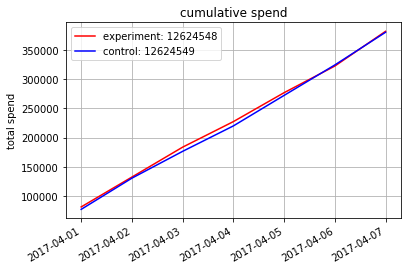

In [87]:
PrintDailyTimeSeries(df,experiment_ids,country,vertical)